In [1]:
# Import all the required library
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import *

import warnings
warnings.filterwarnings('ignore')

from fastai.imports import *


In [2]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Select the path 
path = Path('/content/drive/My Drive/Multiclass-classification-5-vehical-classes/')

In [ ]:
#Check the folder inside the path
path.ls()

[PosixPath('/content/drive/My Drive/Multiclass-classification-5-vehical-classes/test_actual_labels.csv'),
 PosixPath('/content/drive/My Drive/Multiclass-classification-5-vehical-classes/labels.csv'),
 PosixPath('/content/drive/My Drive/Multiclass-classification-5-vehical-classes/test'),
 PosixPath('/content/drive/My Drive/Multiclass-classification-5-vehical-classes/train'),
 PosixPath('/content/drive/My Drive/Multiclass-classification-5-vehical-classes/models'),
 PosixPath('/content/drive/My Drive/Multiclass-classification-5-vehical-classes/result_resnet50.csv'),
 PosixPath('/content/drive/My Drive/Multiclass-classification-5-vehical-classes/result_resnet50_updated.csv')]

In [ ]:
##Read the label file
df = pd.read_csv(path/'labels.csv')
df.head()

image_name     tags
0  001133_05.jpg  Bicycle
1  001150_01.jpg  Bicycle
2  001150_09.jpg  Bicycle
3  001153_05.jpg  Bicycle
4  001156_02.jpg  Bicycle

##Data augmentation


Use the get_transforms function with the below given parameter 

In [ ]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [30]:
#See the document of the function
doc(get_transforms)

In [42]:
def get_ex(): return open_image(path/'train'/'000015_14.jpg')

**Random zoom / crop**
* **Randomly crop or zoom the image.**

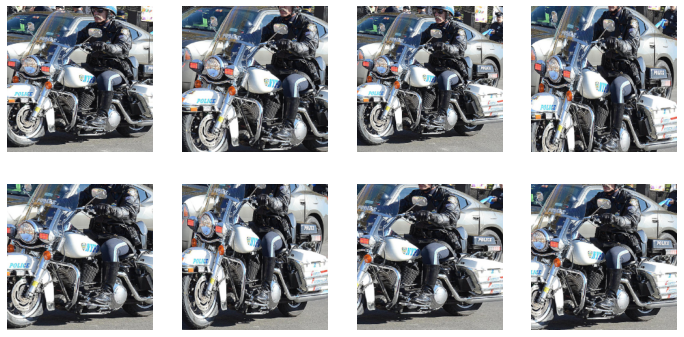

In [46]:
# random resize and crop
tfms = [rand_resize_crop(224)]
plots_f(2, 4, 12, 6, size=224)

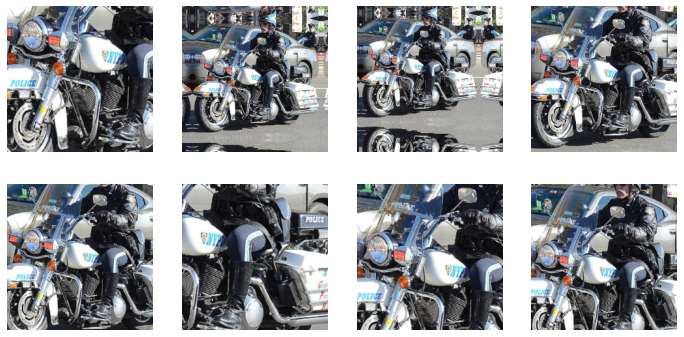

In [45]:
tfms = zoom_crop(scale=(0.75,2), do_rand=True)
# random zoom and crop
plots_f(2, 4, 12, 6, size=224)

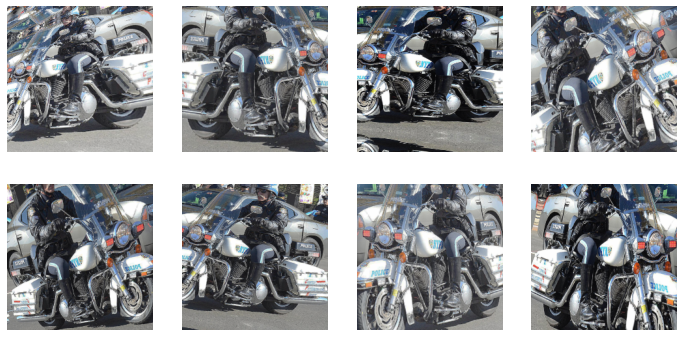

In [44]:
def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
plots_f(2, 4, 12, 6, size=224)

**Rotation**
*   **The randomness can be introduce in the transformations defining  the probability that an image will be transformed. Based on that probability, the image will be transformed or not transformed. we rotate the image by 30 degrees with a 50% probability.
.**

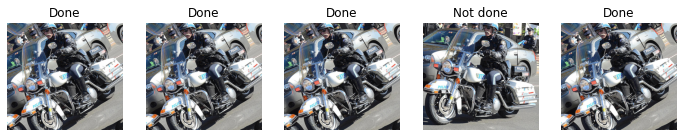

In [47]:
# passing a probability to a function
tfm = [rotate(degrees=30, p=0.5)]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = 'Done' if tfm[0].do_run else 'Not done'
    img.show(ax=ax, title=title)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


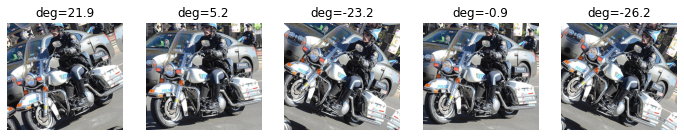

In [48]:
tfm = [rotate(degrees=(-30,30))]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = get_ex().apply_tfms(tfm)
    title = f"deg={tfm[0].resolved['degrees']:.1f}"
    img.show(ax=ax, title=title)

**Brightness**
*   **This transform takes an argument called change. Setting change to 0 will convert our image to black and setting it to 1 will turn it white
.**

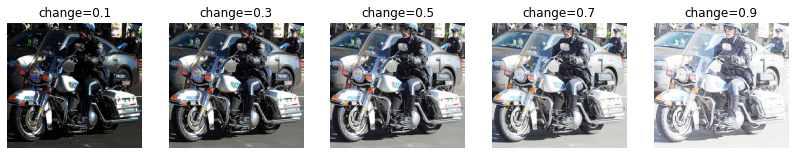

In [49]:
# brightness
fig, axs = plt.subplots(1,5,figsize=(14,8))
for change, ax in zip(np.linspace(0.1,0.9,5), axs):
    brightness(get_ex(), change).show(ax=ax, title=f'change={change:.1f}')

**Contrast**
*   **Similar to brightness, contrast can be set using a scale parameter.**



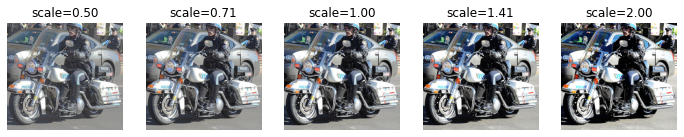

In [50]:
# contrast
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
    contrast(get_ex(), scale).show(ax=ax, title=f'scale={scale:.2f}')

**Jitter**
*   **This transform changes the pixels of the image by randomly replacing them with pixels from the neighborhood thus causing jitter.**


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


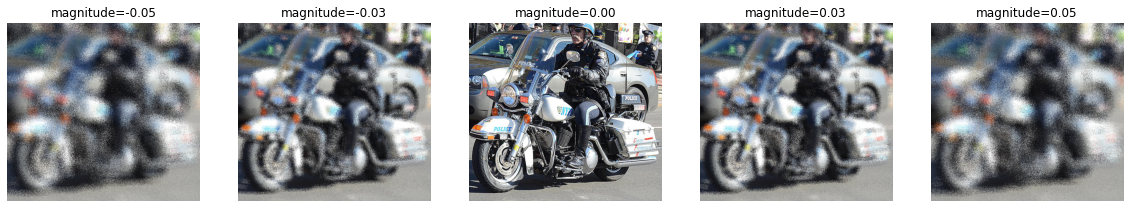

In [51]:
# jitter
fig, axs = plt.subplots(1,5,figsize=(20,8))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfm = jitter(magnitude=magnitude)
    get_ex().jitter(magnitude).show(ax=ax, title=f'magnitude={magnitude:.2f}')

## Extract data

Create a image Databunch by using from csv.Give folder as train to create train and validation data images and test equal to test to create test data images.
Use seed equal to 1 and pct equal to 2.Since the label is in csv file give csv_labels as labels.csv


In [30]:

data = ImageDataBunch.from_csv(path,folder='train',test='test',csv_labels='labels.csv',ds_tfms=tfms ,valid_pct=0.2, size=224,seed =1,bs=64
                                  ).normalize(imagenet_stats)

In [ ]:
#print the data to check the detail of train,test and validation images .Train data will have 4k ,validation 1k and test have 788 images
data

ImageDataBunch;

Train: LabelList (4000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bicycle,Bicycle,Bicycle,Bicycle,Bicycle
Path: /content/drive/My Drive/Multiclass-classification-5-vehical-classes;

Valid: LabelList (1000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bus,Motorcycle,Car,Car,Bus
Path: /content/drive/My Drive/Multiclass-classification-5-vehical-classes;

Test: LabelList (788 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/Multiclass-classification-5-vehical-classes

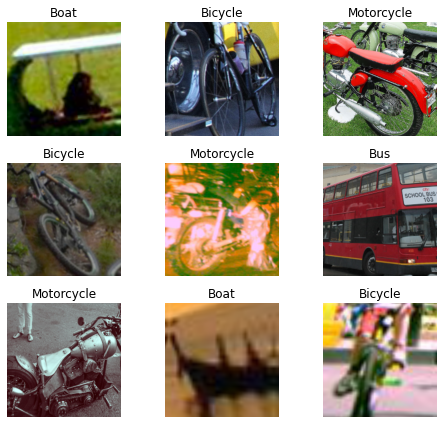

In [ ]:
#Show the image with the label
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
#Print the classes
print(data.classes)
len(data.classes),data.c


['Bicycle', 'Boat', 'Bus', 'Car', 'Motorcycle']


(5, 5)

##Train the Resnet 50 model

Use cnn_learner to learn the model .Use the resnet50 model  

In [6]:
#Learn the basic resnet34 model
learn_resnet50 = cnn_learner(data,models.resnet50,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth



Print Model to check the model summary


In [7]:
learn_resnet50.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [9]:
#Import Call back 
from fastai.callbacks import *

**Train the model with fit_one_cycle.**
1.   Use no of epochs equal to 10
2.   As we are running 10 no of epochs we will save the model after each epoch so that we will have the best model.
1.   We will use SaveModelallback  function and pass every equal to epoch to save model after each epoch












In [ ]:
#Fit the model with with 10 no of epoch
learn_resnet50.fit_one_cycle(10,callbacks=[SaveModelCallback(learn_resnet50, every='epoch', monitor='accuracy')])

Result
  
1.The best accuracy we are getting is 95% and with low validation and training 

**Lets interpret the result and check the top losses**

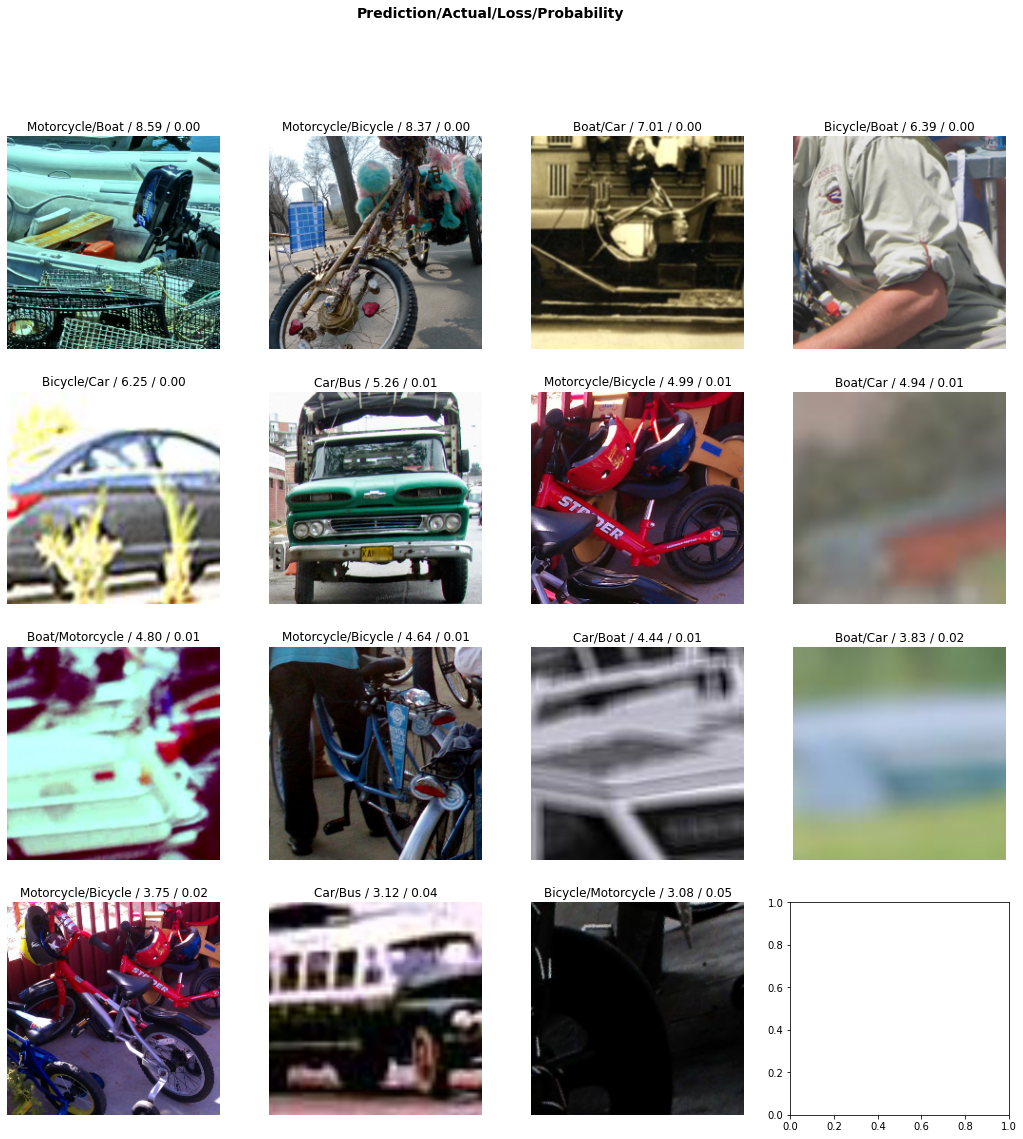

In [11]:

interp_resnet50 = ClassificationInterpretation.from_learner(learn_resnet50)
interp_resnet50.plot_top_losses(15, figsize=(18,18))

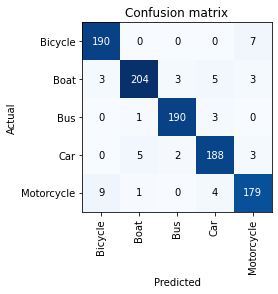

In [ ]:
#Print the confusion matrix
interp_resnet50.plot_confusion_matrix( )

Result

1.   From the top losses it seems that there are many blurred images that need to be Either deleted or should be enhanced
2.   The most confused class is motorcycle and bicycle



In [14]:
from fastai.widgets import *

In [18]:
ds, idxs = interp_resnet50.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [25]:
ds, idxs = DatasetFormatter().from_toplosses(learn_resnet50)

In [26]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

The above images are totally blurred and one can't predict any thing from them .We can simply delete these imgaes by clicking the delete the button

In [28]:
#Lets try to delet the unwanted images
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Prediction on test data

Predict any one image to see output of predict class

In [ ]:
p1=learn_resnet50.predict(data.test_ds.x[0])
print(p1)
print("label",int(p1[0]))
print("label",str(p1[0]))

(Category tensor(0), tensor(0), tensor([9.9941e-01, 3.4879e-05, 6.0286e-07, 2.0882e-07, 5.5849e-04]))
label 0
label Bicycle


Result :

1.   Predict will give tuple of three value.The first index will give category of predicted classes .The second index will give class and third index will give probability for each class 






In [ ]:
## Prediction on the test data
preds = []
cat = []
filename = []
for i in range(0,788):
    f = str(learn_resnet50.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet50.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
    cat.append(str(p[0]))

In [14]:
df1 = pd.read_csv(path/'test_actual_labels.csv', header='infer')
df1.head()

image_name     tags
0  001178_05.jpg  Bicycle
1  001184_08.jpg  Bicycle
2  001188_03.jpg  Bicycle
3  001195_05.jpg  Bicycle
4  001201_19.jpg  Bicycle

In [ ]:
#Create dataframe from the predicted  value
df=pd.DataFrame(list(zip(filename,preds,cat)),columns=['pred_image_name','pred_value','Category'])
df.head()

pred_image_name  pred_value Category
0   001202_19.jpg           0  Bicycle
1   001272_18.jpg           0  Bicycle
2   001283_19.jpg           0  Bicycle
3   001258_18.jpg           0  Bicycle
4   001259_18.jpg           0  Bicycle

In [ ]:
#Create dataframe from the predicted  value
result_resnet50 = pd.merge (df1,df,left_on='image_name', right_on='pred_image_name')
result_resnet50.to_csv(path/'result_resnet50.csv')

##Unfreezing, fine-tuning, and learning rates for resnet50

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


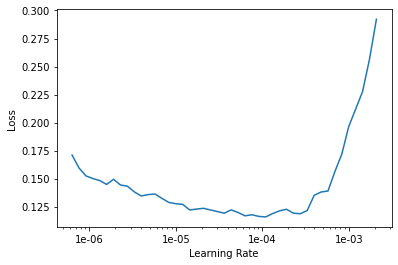

In [ ]:
#Unfreeze the renet50 model
learn_resnet50.unfreeze()
learn_resnet50.lr_find()
learn_resnet50.recorder.plot()

Result:

1.   Based on the LR plot the best learning rate where the loss is minimum is 4e-04



In [ ]:
#Train the unfreeze model
learn_resnet50.fit_one_cycle(5,max_lr=slice(1e-6,1e-3)

Result

1.The best accuracy we are getting is 95.4% and with low validation and training loss

Do the prediciton on the test data and store the result in the dataframe

In [ ]:

preds = []
cat = []
filename = []
for i in range(0,788):
    f = str(learn_resnet50.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet50.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
    cat.append(str(p[0]))

In [ ]:
#Create dataframe from the predicted  value
#Create dataframe from the predicted  value
df2=pd.DataFrame(list(zip(filename,preds,cat)),columns=['pred_image_name','pred_value','Category'])
result_resnet50 = pd.merge (df1,df2,left_on='image_name', right_on='pred_image_name')
result_resnet50.to_csv(path/'result_resnet50_updated.csv')


##Use of Mixup to train the cnn learner .Change the batch size of 128

In [ ]:
data = ImageDataBunch.from_csv(path,folder='train',test='test',csv_labels='labels.csv',ds_tfms=get_transforms(),valid_pct=0.2, size=224,seed =1,bs=128
                                  ).normalize(imagenet_stats)

In [ ]:
#Learn the basic resnet50 model
#Since some of the incorrected image are blurred ,so let use mixup that will train the model on mixes of the training set images
learn_resnet50_bs128 = cnn_learner(data,models.resnet50,metrics=accuracy).mixup()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn_resnet50_bs128.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
#Fit the model with with 10 no of epoch and save the best model at improvement
learn_resnet50_bs128.fit_one_cycle(10,callbacks=[SaveModelCallback(learn_resnet50, every='improvement', monitor='accuracy')])

Better model found at epoch 0 with accuracy value: 0.9539999961853027.


Result

1.The best accuracy we are getting is 95.3% and with low validation and training loss

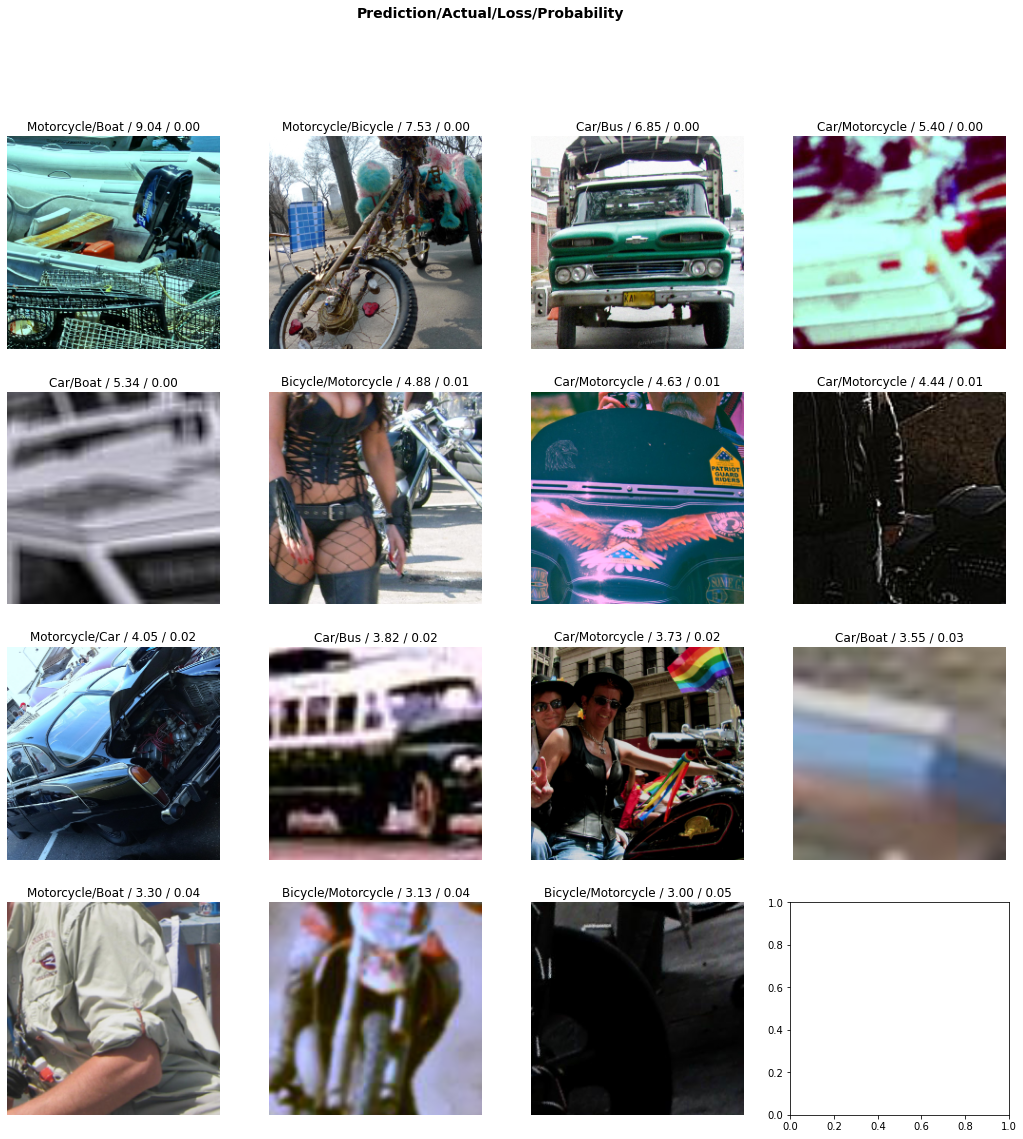

In [ ]:
# interpret the result
interp_resnet50_bs128 = ClassificationInterpretation.from_learner(learn_resnet50)
interp_resnet50_bs128.plot_top_losses(15, figsize=(18,18))

In [ ]:
# interpret the result

preds = []
cat = []
filename = []
for i in range(0,706):
    f = str(learn_resnet50_bs128.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet50_bs128.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
    cat.append(str(p[0]))

#Create dataframe from the predicted  value
#Create dataframe from the predicted  value
df3=pd.DataFrame(list(zip(filename,preds,cat)),columns=['pred_image_name','pred_value','Category'])
result_resnet50_bs128 = pd.merge (df1,df3,left_on='image_name', right_on='pred_image_name')
result_resnet50_bs128.to_csv(path/'result_resnet50_updated.csv')

## Use Mixup ,Unfreeze Resnet50 with batch size 120 and train the model with lr having low validaition loss.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


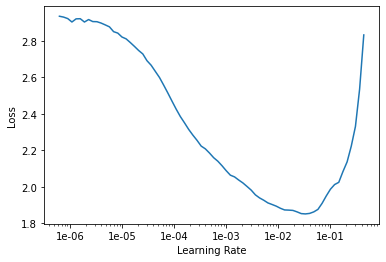

In [ ]:
#Lets unfreeze the layer and tune the learning rate for resnet150 with mixup
learn_resnet50_bs128.unfreeze()
learn_resnet50_bs128.lr_find()
learn_resnet50_bs128.recorder.plot()


Result
1.  The best learning rate with low loss is 8e-02




Better model found at epoch 0 with accuracy value: 0.4339999854564667.
Better model found at epoch 2 with accuracy value: 0.7580000162124634.
Better model found at epoch 3 with accuracy value: 0.8840000033378601.
Better model found at epoch 4 with accuracy value: 0.9070000052452087.


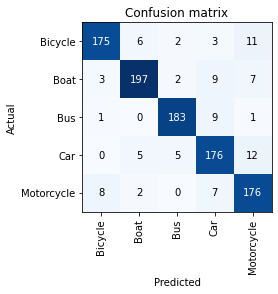

In [ ]:
#Train the model with the best 
learn_resnet50_bs128.fit_one_cycle(5,max_lr=slice(1e-4,8e-2),callbacks=[SaveModelCallback(learn_resnet50_bs128, every='improvement', monitor='accuracy',name='learn_resnet50_bs128_mixup')])
interp = ClassificationInterpretation.from_learner(learn_resnet50_bs128)
interp.plot_confusion_matrix( )
preds = []
filename = []
for i in range(0,706):
    f = str(learn_resnet50_bs128.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet50_bs128.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))  


From the above its seems that even after using mixup the accuracy does not improve much rather it decreases

## Use Custom Head and change the head of renet50 model

Lets try customer head


In [6]:
##Create the ImageDatabunch
data = ImageDataBunch.from_csv(path,folder='train',test='test',csv_labels='labels.csv',ds_tfms=get_transforms(),valid_pct=0.2, size=224,seed =1,bs=64
                                  ).normalize(imagenet_stats)

In [7]:
data

ImageDataBunch;

Train: LabelList (4000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bicycle,Bicycle,Bicycle,Bicycle,Bicycle
Path: /content/drive/My Drive/Multiclass-classification-5-vehical-classes;

Valid: LabelList (1000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bus,Motorcycle,Car,Car,Bus
Path: /content/drive/My Drive/Multiclass-classification-5-vehical-classes;

Test: LabelList (788 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/Multiclass-classification-5-vehical-classes

In [8]:
from fastai.vision.learner import num_features_model,create_body
concat_pool = True
body = create_body(models.resnet50, True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [9]:
##Calculate the no of feature require to create head
nf = num_features_model(nn.Sequential(*body.children())) * (2 if concat_pool else 1)
print(nf)

4096


In [10]:
#Create the custome head
nc = 5 #num output classes
custom_head = create_head(nf,nc,lin_ftrs=[256])
print(custom_head)

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten()
  (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=4096, out_features=256, bias=True)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=256, out_features=5, bias=True)
)


In [11]:
  learn_resnet50_custom = cnn_learner(data,models.resnet50,custom_head=custom_head,metrics=accuracy)

In [12]:
learn_resnet50_custom

Learner(data=ImageDataBunch;

Train: LabelList (4000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bicycle,Bicycle,Bicycle,Bicycle,Bicycle
Path: /content/drive/My Drive/Multiclass-classification-5-vehical-classes;

Valid: LabelList (1000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bus,Motorcycle,Car,Car,Bus
Path: /content/drive/My Drive/Multiclass-classification-5-vehical-classes;

Test: LabelList (788 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/Multiclass-classification-5-vehical-classes, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

The final layer of resnet50 changes as per the define custom head.
Now unfreeze the layer and train the model by finding optimum LR

In [4]:
  torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


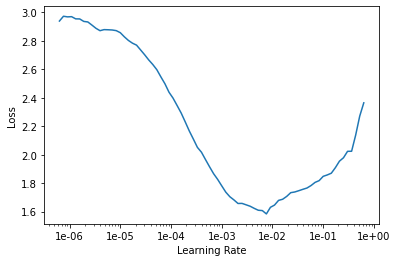

In [13]:
#Lets unfreeze the layer and tune the learning rate for resnet150 with mixup
learn_resnet50_custom.unfreeze()
learn_resnet50_custom.lr_find()
learn_resnet50_custom.recorder.plot()


Better model found at epoch 0 with accuracy value: 0.7960000038146973.
Better model found at epoch 2 with accuracy value: 0.8050000071525574.


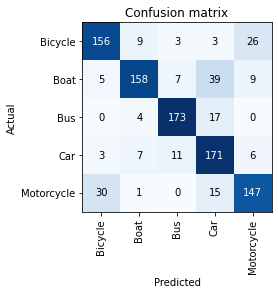

In [27]:
learn_resnet50_custom.fit_one_cycle(5,max_lr=slice(1e-06,1e-2),callbacks=[SaveModelCallback(learn_resnet50_custom, every='improvement', monitor='accuracy',name='learn_resnet50_custom')])
interp = ClassificationInterpretation.from_learner(learn_resnet50_custom)
interp.plot_confusion_matrix( ) 

Result

1.   The accuracy doesnot improve by changing custom head
  

In [28]:
#Prediciton on test data
preds = []
cat = []
filename = []
for i in range(0,706):
    f = str(learn_resnet50_custom.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet50_custom.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
    cat.append(str(p[0])) 

## Use Densenet121 model to train and predict.

In [31]:
#Learn the CNN learner
learn_densenet121 = cnn_learner(data,models.densenet121,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


Better model found at epoch 0 with accuracy value: 0.9079999923706055.
Better model found at epoch 2 with accuracy value: 0.9089999794960022.
Better model found at epoch 3 with accuracy value: 0.925000011920929.
Better model found at epoch 4 with accuracy value: 0.9380000233650208.
Better model found at epoch 5 with accuracy value: 0.9490000009536743.


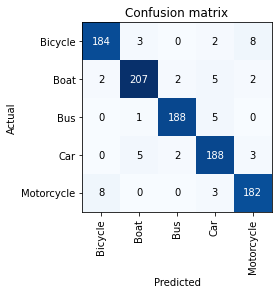

In [32]:
#Fit the model with with 10 no of epoch
learn_densenet121.fit_one_cycle(10,callbacks=[SaveModelCallback(learn_densenet121, every='improvement', monitor='accuracy',name='learn_densenet121_mixup')])
interp = ClassificationInterpretation.from_learner(learn_densenet121)
interp.plot_confusion_matrix( )

Result
*   The most confused class is bicycle and motorcycle with 16 incorrect prediction for both the classes
*   The highest accuracy is 94.9% with low training and validation loss



In [33]:
## Prediction on the test data
preds = []
cat = []
filename = []
for i in range(0,788):
    f = str(learn_densenet121.data.test_ds.items[i]).split('/')[-1]
    p = learn_densenet121.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
    cat.append(str(p[0]))
df1 = pd.read_csv(path/'test_actual_labels.csv', header='infer')
df=pd.DataFrame(list(zip(filename,preds,cat)),columns=['pred_image_name','pred_value','Category'])
#Create dataframe from the predicted  value
result_densenet121 = pd.merge (df1,df,left_on='image_name', right_on='pred_image_name')
result_densenet121.to_csv(path/'result_densenet121.csv')

## Unfreeze the densenet121 model and train model with best lr

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


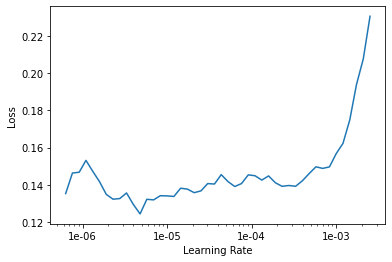

In [35]:
#Lets unfreeze the layer and tune the learning rate for learn_densenet121 with mixup
learn_densenet121.unfreeze()
learn_densenet121.lr_find()
learn_densenet121.recorder.plot()


In [37]:
#Train the unfreeze model
learn_densenet121.fit_one_cycle(5,max_lr=slice(1e-6,1e-3))

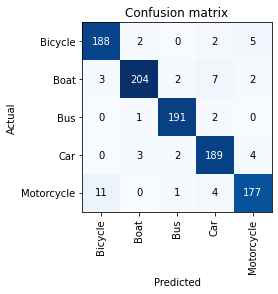

In [38]:
interp = ClassificationInterpretation.from_learner(learn_densenet121)
interp.plot_confusion_matrix( )
## Prediction on the test data
preds = []
cat = []
filename = []
for i in range(0,788):
    f = str(learn_densenet121.data.test_ds.items[i]).split('/')[-1]
    p = learn_densenet121.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
    cat.append(str(p[0]))
df1 = pd.read_csv(path/'test_actual_labels.csv', header='infer')
df=pd.DataFrame(list(zip(filename,preds,cat)),columns=['pred_image_name','pred_value','Category'])
#Create dataframe from the predicted  value
result_densenet121_updated = pd.merge (df1,df,left_on='image_name', right_on='pred_image_name')
result_densenet121_updated.to_csv(path/'result_densenet121_updated.csv')
learn_densenet121.save(path/'learn_densenet121_updated')

Result
*   The most confused class is bicycle and motorcycle with 16 incorrect prediction for both the classes
*   The highest accuracy is 94.9% with low training and validation loss